In [1]:
from mord import OrdinalRidge
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

In [2]:
# Read in dataset, ordinally encode dependent variable
data = pd.read_csv('classifierInput.csv')
df = pd.DataFrame(data)
df['BinnedProdLoss'] = pd.Categorical(df['BinnedProdLoss'], categories = ['Low', 'Medium', 'High'], ordered = True).codes

In [3]:
# Establish X and y matrices for regression, split categorical and continuous cols for encoding and standardization
X = df.drop(columns = ['BinnedProdLoss', 'ProductivityLoss', 'Profession', 'Device', 'OS', 'Connection', 'VideoLength', 'VideoTime', 'Genre'])
y = df['BinnedProdLoss']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

categorical_cols = X.select_dtypes(include = ['object', 'category', 'bool']).columns.tolist()
continuous_cols = X.select_dtypes(include = ['float64', 'int64']).columns.tolist()

In [ ]:
# Create pipeline to preprocess current data and future inputs
preprocessor = ColumnTransformer([
    ('cont', StandardScaler(), continuous_cols),
    ('cat', OneHotEncoder(drop = 'first'), categorical_cols)
])

pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', OrdinalRidge())
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cont', StandardScaler(),
                                                  ['Age', 'Income',
                                                   'MinutesSpent',
                                                   'NumSessions',
                                                   'NumVideos']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['HasDebt', 'OwnsProperty',
                                                   'Demographics', 'Platform',
                                                   'TimeOfDay', 'WatchReason',
                                                   'CurrentActivity'])])),
                ('smote', SMOTE(random_state=42)), ('model', OrdinalRidge())])

              precision    recall  f1-score   support

         Low       0.91      0.72      0.80        94
      Medium       0.66      0.97      0.79       102
        High       0.85      0.41      0.55        54

    accuracy                           0.76       250
   macro avg       0.81      0.70      0.71       250
weighted avg       0.79      0.76      0.74       250

Accuracy: 0.756
Precision: 0.7947631457580451
Recall: 0.756
F1 Score: 0.743228487234494


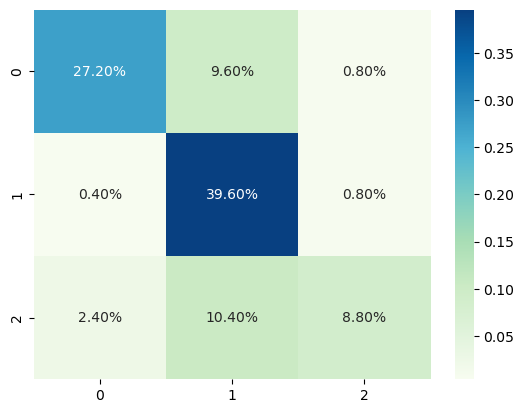

In [5]:
# Test model
y_pred = pipeline.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm / np.sum(cm), annot = True, fmt = '.2%', cmap = 'GnBu')

print(classification_report(y_test, y_pred, target_names = ['Low', 'Medium', 'High']))

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

precision = precision_score(y_test, y_pred, average = 'weighted')
print('Precision:', precision)

recall = recall_score(y_test, y_pred, average = 'weighted')
print('Recall:', recall)

f1Score = f1_score(y_test, y_pred, average = 'weighted')
print('F1 Score:', f1Score)

In [6]:
def getPred(score: int):
    if score == 0:
        return 'Low'
    elif score == 1:
        return 'Medium'
    else:
        return 'High'
    
user_input = pd.DataFrame(
  [[23, 15000, True, False, 'Urban', 'TikTok', 14440, 50, 300, 'Night', 'Procrastination', 'Home']],
  columns = X_train.columns
)

# Encode and standardize user data, form prediction using trained model
user_pred = pipeline.predict(user_input)[0]
print('Prediction:', getPred(user_pred), '\n')

Prediction: Low 

